In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

In [24]:
df = pd.read_csv("pizza_sales.csv")

In [25]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  float64
 1   order_id           48620 non-null  float64
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  float64
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.5+ MB


In [7]:
df.describe(include='all')

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
count,48620.000000,48620.000000,48620,48620.000000,48620,48620,48620.000000,48620.000000,48620,48620,48620,48620
unique,NaN,NaN,91,NaN,358,16382,NaN,NaN,5,4,32,32
top,NaN,NaN,big_meat_s,NaN,26-11-2015,12:32:00,NaN,NaN,L,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
freq,NaN,NaN,1811,NaN,261,26,NaN,NaN,18526,14579,2416,2416
mean,24310.500000,10701.479761,NaN,1.019622,NaN,NaN,16.494132,16.821474,NaN,NaN,NaN,NaN
std,14035.529381,6180.119770,NaN,0.143077,NaN,NaN,3.621789,4.437398,NaN,NaN,NaN,NaN
min,1.000000,1.000000,NaN,1.000000,NaN,NaN,9.750000,9.750000,NaN,NaN,NaN,NaN
25%,12155.750000,5337.000000,NaN,1.000000,NaN,NaN,12.750000,12.750000,NaN,NaN,NaN,NaN
50%,24310.500000,10682.500000,NaN,1.000000,NaN,NaN,16.500000,16.500000,NaN,NaN,NaN,NaN
75%,36465.250000,16100.000000,NaN,1.000000,NaN,NaN,20.250000,20.500000,NaN,NaN,NaN,NaN


In [8]:
df.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [9]:
df.drop_duplicates(inplace=True)

In [14]:
df['order_date'] = df['order_date'].astype(str).str.replace('-', '/', regex=False)
df['order_time'] = df['order_time'].astype(str)
df['order_datetime'] = pd.to_datetime(df['order_date'] + ' ' + df['order_time'], errors='coerce')
df['order_hour'] = df['order_datetime'].dt.hour

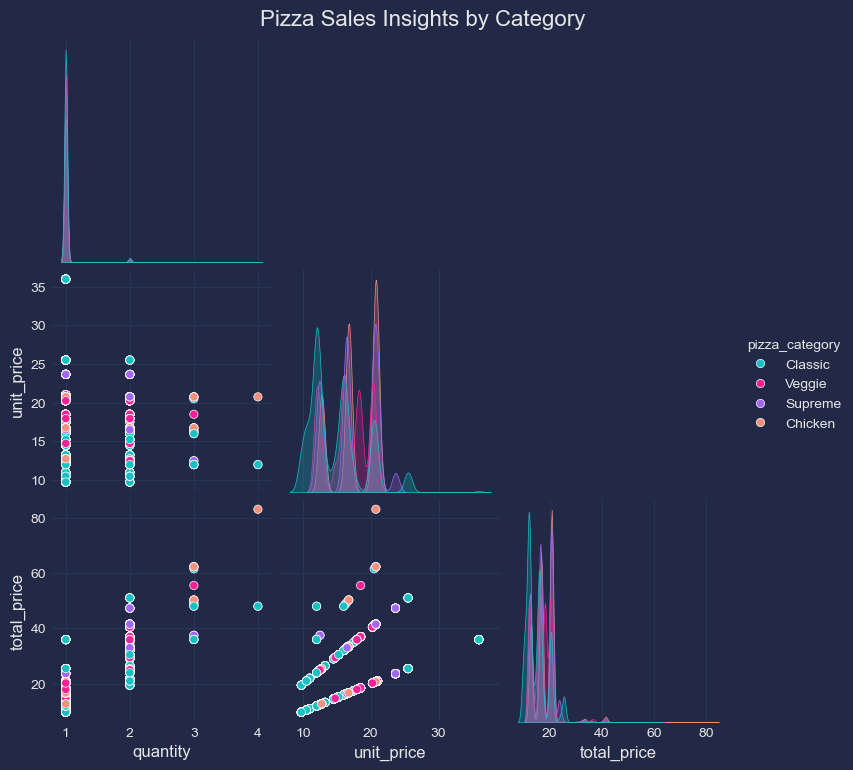

In [83]:
cols = ['quantity', 'unit_price', 'total_price', 'pizza_category']
df_pair = df[cols].dropna()
sns.pairplot(df_pair, hue='pizza_category', diag_kind='kde', corner=True)
plt.suptitle("Pizza Sales Insights by Category", fontsize=16, y=1.02)
plt.show()

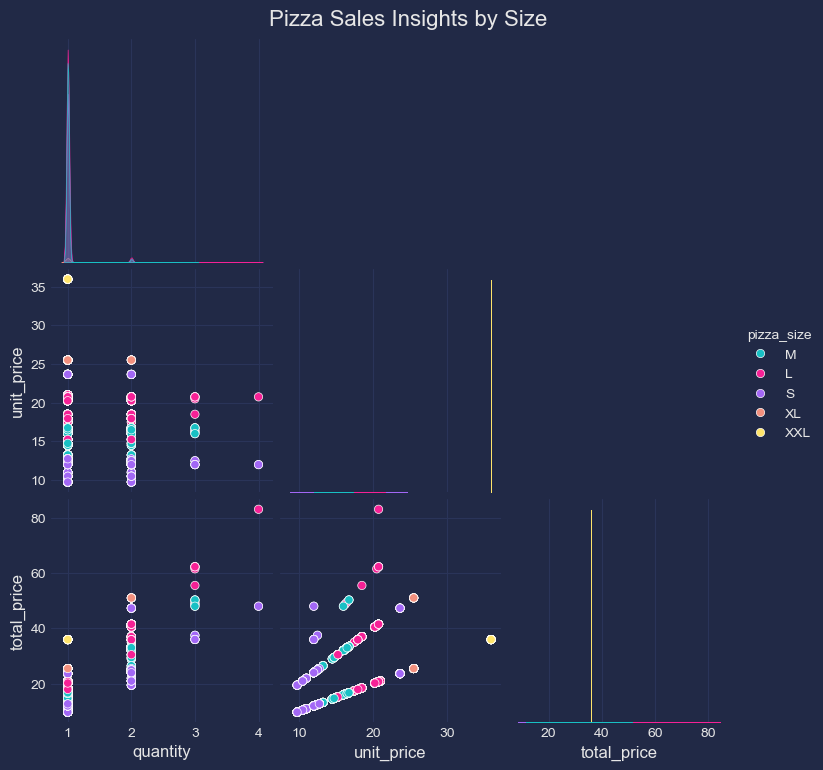

In [84]:
cols = ['quantity', 'unit_price', 'total_price', 'pizza_size']
df_pair = df[cols].dropna()

sns.pairplot(df_pair, hue='pizza_size', diag_kind='kde', corner=True)
plt.suptitle("Pizza Sales Insights by Size", fontsize=16, y=1.02)
plt.show()


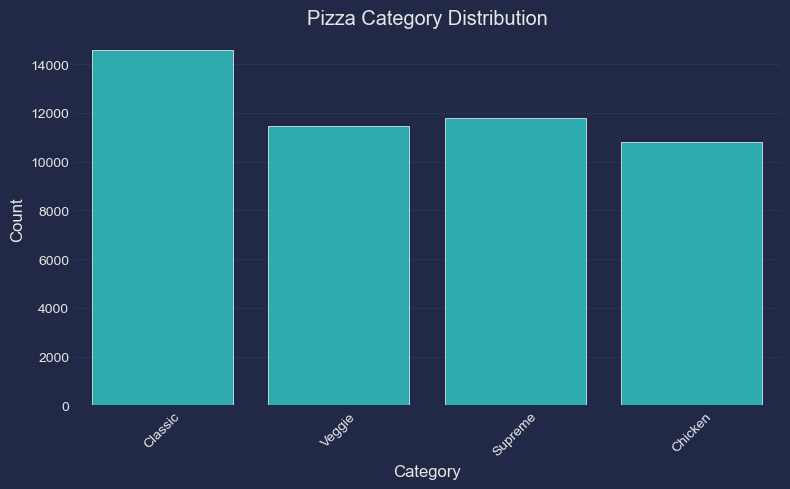

In [85]:
plt.figure(figsize=(8, 5))
sns.countplot(x='pizza_category', data=df)
plt.title('Pizza Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

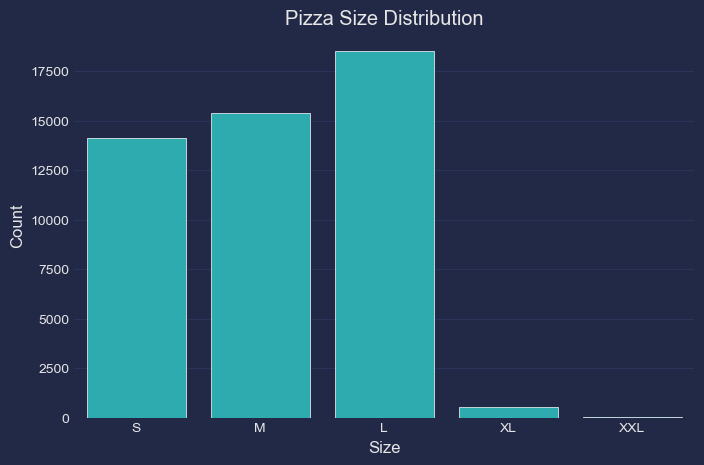

In [86]:
plt.figure(figsize=(8, 5))
sns.countplot(x='pizza_size', data=df, order=['S', 'M', 'L', 'XL', 'XXL'])
plt.title('Pizza Size Distribution')
plt.xlabel('Size')
plt.ylabel('Count')
plt.show()

C:\Users\YAHIA ZAKARIA\AppData\Local\Temp\ipykernel_5844\4219259504.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pizza_category', y='total_price', data=df, palette='Set2')


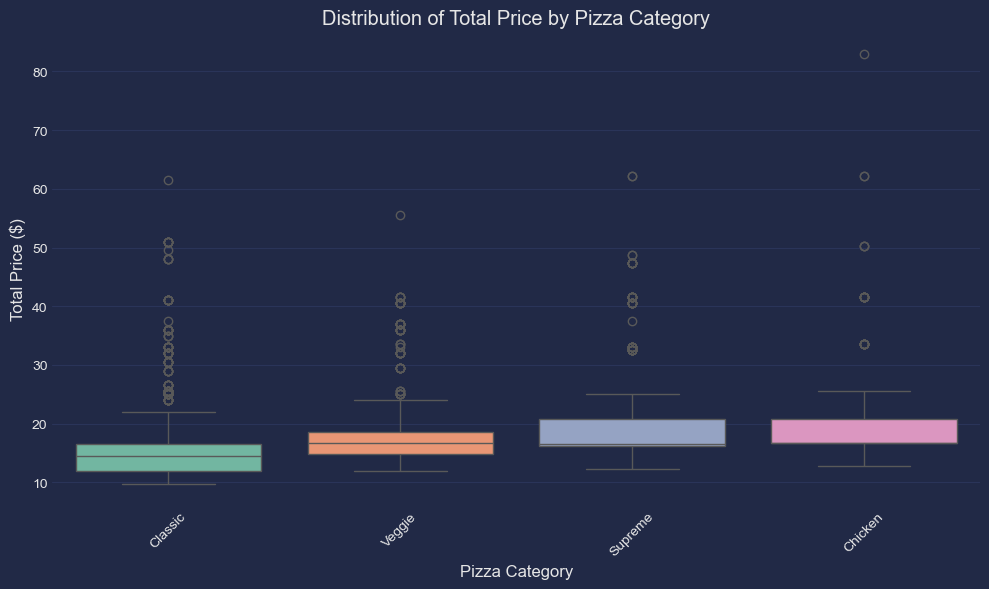

In [96]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='pizza_category', y='total_price', data=df, palette='Set2')

plt.title('Distribution of Total Price by Pizza Category')
plt.xlabel('Pizza Category')
plt.ylabel('Total Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

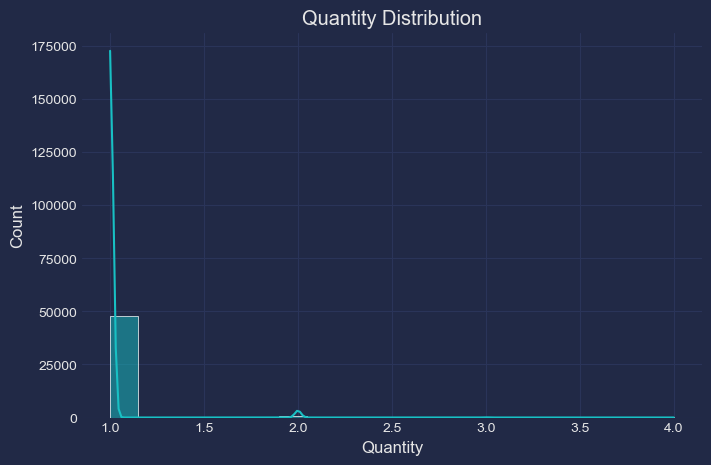

In [88]:
plt.figure(figsize=(8, 5))
sns.histplot(df['quantity'], bins=20, kde=True)
plt.title('Quantity Distribution')
plt.xlabel('Quantity')
plt.show()

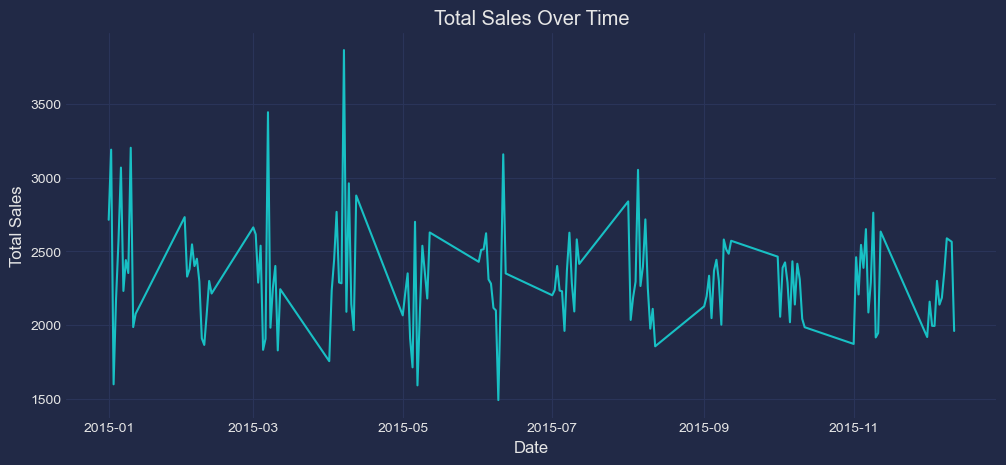

In [89]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df_daily_sales = df.groupby('order_date')['total_price'].sum().reset_index()
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_daily_sales, x='order_date', y='total_price')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

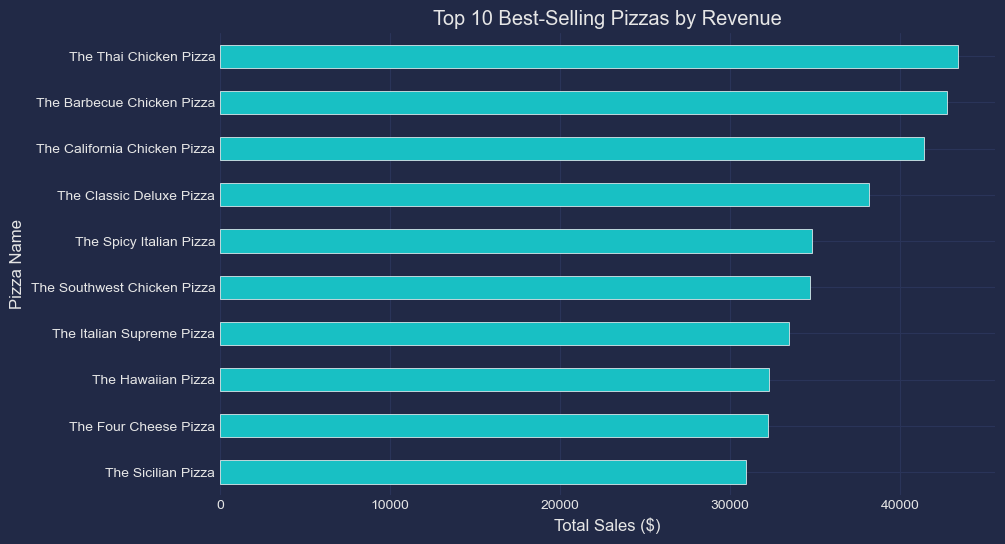

In [90]:
top_pizzas = df.groupby('pizza_name')['total_price'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_pizzas.plot(kind='barh')
plt.title('Top 10 Best-Selling Pizzas by Revenue')
plt.xlabel('Total Sales ($)')
plt.ylabel('Pizza Name')
plt.gca().invert_yaxis()
plt.show()

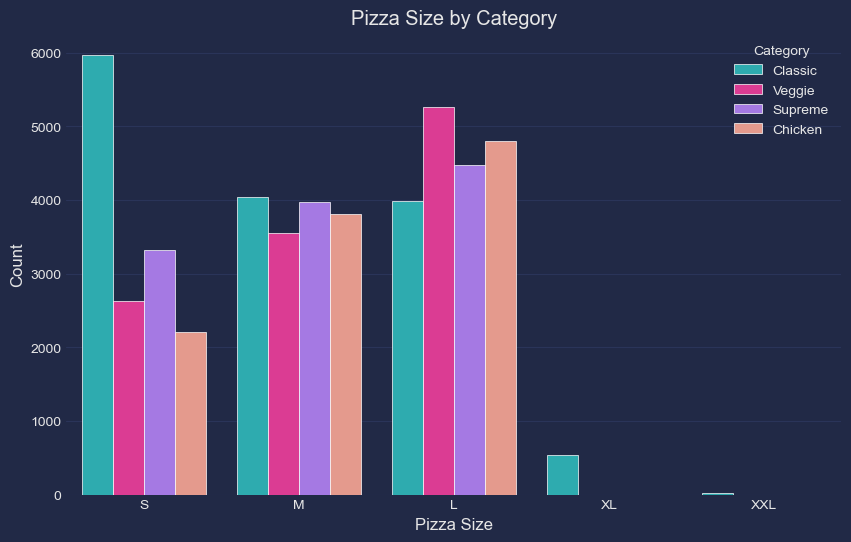

In [91]:
plt.figure(figsize=(10, 6))
sns.countplot(x='pizza_size', hue='pizza_category', data=df,
              order=['S', 'M', 'L', 'XL', 'XXL'])
plt.title('Pizza Size by Category')
plt.xlabel('Pizza Size')
plt.ylabel('Count')
plt.legend(title='Category')
plt.show()

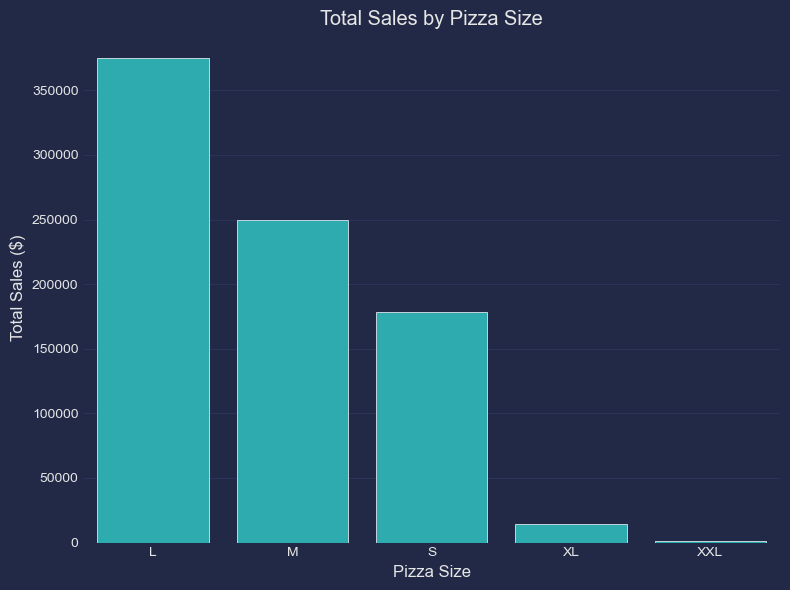

In [92]:
sales_by_size = df.groupby('pizza_size')['total_price'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
#sns.set_style("white")  
ax = sns.barplot(x=sales_by_size.index, y=sales_by_size.values)
plt.title('Total Sales by Pizza Size')
plt.xlabel('Pizza Size')
plt.ylabel('Total Sales ($)')
plt.tight_layout()
plt.show()
